<img src="http://naonedia.fr/wp-content/uploads/2018/10/logoNaonedia.png" style="height:100px">
<h1>
    <center>Expérience Logement</center>
    <center>-</center>
    <center>Analyse des modèles</center>
</h1>


<h3> Introduction </h3>

Le but de ce notebook est d'analyser les différents modèles. Le but est de regarder les résultats en prédiction et généralisation. On peut ainsi caractériser un modèle et déterminer si il est satisfaisant ou non.

<h3>Informations</h3>

Il est fortement conseillé d'utiliser Python3.x
Si vous ne disposez pas de toutes les librairies requises , il suffit de l'installer en utilisant la commande suivante.
<br>
<code>pip3 install ....</code>

<h3>Authors:</h3>
<cite>Thibault Brocherieux - Ippon Technologies</cite>

### Import des librairies requises

In [1]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
import keras
from sklearn.metrics import median_absolute_error, mean_absolute_error
import pandas as pd
import json
import folium

plt.rcParams['figure.figsize'] = [25, 10]

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1

### Fonctions pour l'affichage des graphiques

In [2]:
py.init_notebook_mode(connected=True)

def py_table(data, filename):
    table = ff.create_table(data)
    py.iplot(table, filename=filename)

def py_pie(values, title, filename, labels=None):
    if labels is None:
        labels = values.index
        values = values.values
    pie = go.Pie(labels=labels, values=values, title=title)
    
    
    layout = go.Layout(legend=dict(orientation="h"))

    fig = go.Figure(data=[pie], layout=layout)
    
    py.iplot(fig,filename=filename)

def py_pie_compare(values_1, values_2, name_1, name_2, title, filename, labels_1=None, labels_2=None):

    if labels_1 is None:
        labels_1 = values_1.index
        values_1 = values_1.values
    
    if labels_2 is None:
        labels_2 = values_2.index
        values_2 = values_2.values

    pie_1 = go.Pie(labels=labels_1, values=values_1, title=name_1 + ' ' + title,domain=dict(x=[0, 0.4])),
    pie_2 = go.Pie(labels=labels_2, values=values_2, title=name_2 + ' ' + title,domain=dict(x=[0.6, 1])),
    
    layout = go.Layout(legend=dict(orientation="h"))

    fig = go.Figure(data=[pie_1[0], pie_2[0]], layout=layout)
    
    py.iplot(fig,filename=filename)
    
def loadHistoryFile(file):
    res = {}
    with open(file) as json_data:
        res = json.load(json_data)
    return res

def plotHistory(train, test, text):
    plt.plot(train)
    plt.plot(test)
    plt.title('model ' + text)
    plt.ylabel(text)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plotHistoryCompare(train_1, test_1, train_2, test_2, text, name_1, name_2):
    plt.subplot(121)
    plt.plot(train_1)
    plt.plot(test_1)
    plt.title(name_1 + ' ' + text)
    plt.ylabel(text)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(122)
    plt.plot(train_2)
    plt.plot(test_2)
    plt.title(name_2 + ' ' + text)
    plt.ylabel(text)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.show()

### Fonction pour le traitement des données

In [3]:
def normalize(x_train, x_test):
    mu = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train_normalized = (x_train - mu) / std
    x_test_normalized = (x_test - mu) / std
    return x_train_normalized, x_test_normalized

### Fonctions pour afficher des points sur une carte

In [4]:
model = load_model('data/models/modelv5.h5')
map1 = folium.Map(tiles='openstreetmap', location=([47.218371, -1.553621]), zoom_start=12)
data = pd.read_csv('data/datasets/dataset_ready_v2.csv')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [6]:
def getData(map1, model, data):
    for i,row in data.iterrows():
        rowPred = row.drop(['valeur_fonciere','longitude', 'latitude']).to_numpy()
        predicted = model.predict(np.reshape(rowPred, (-1, len(rowPred))))
        real = row['valeur_fonciere']

        tmp = abs(val - real[index])[0]
        tmp2 = int(tmp // 10000 * 10000)

        if tmp2 > 30000:
            folium.map.Marker(([row['latitude'], row['longitude']]),
                              icon=folium.Icon(color='blue',icon_color='#cc0000',icon='pushpin',prefix='fa',),
                             ).add_to(map1)

    return map1

### Chargement des données

In [7]:
# Chargement des données d'entrainement et de test
data_train = pd.read_csv('data/models/modelv2.train.csv')
data_test = pd.read_csv('data/models/modelv2.test.csv')

X_train = data_train.drop(['valeur_fonciere'], axis=1).to_numpy()
y_train = data_train['valeur_fonciere'].to_numpy()
X_test = data_test.drop(['valeur_fonciere'], axis=1).to_numpy()
y_test = data_test['valeur_fonciere'].to_numpy()

# Datasets normalisés
X_train_normal, X_test_normal = normalize(X_train, X_test)

# load model
model = load_model("data/models/modelv2.h5")

# load history
history = loadHistoryFile('data/models/modelv2.history.json')


### Evaluate part of generalisation

In [13]:
def checkResponse(model, index):
    print("Real price %s €, predicted %s €" % (model.predict(np.array([X_test_normal[index]]))[0][0], y_test[index]))
    
def retrieveWrong(predict, real):
    res = []
    ref = median_absolute_error(real, predict)
    for index,val in enumerate(predict):
        tmp = abs(val - real[index])[0]
        if tmp > ref:
            res.append(tmp)
            
    return res

def retrieveTenKGroup(predict, real):
    res = []
    ref = median_absolute_error(real, predict)
    for index,val in enumerate(predict):
        tmp = abs(val - real[index])[0]
        res.append(str(int(tmp // 10000 * 10000)) + 'k')

    return pd.DataFrame({'data':np.array(res)})

def retrieveTenKGroup2(predict, real):
    res = []
    ref = median_absolute_error(real, predict)
    for index,val in enumerate(predict):
        tmp = abs(val - real[index])[0]
        tmp2 = int(tmp // 10000 * 10000)
        if tmp2 > 30000:
            res.append('Autres')
        else:
            res.append(str(tmp2) + 'k')

    return pd.DataFrame({'data':np.array(res)})

def retrieveTenPercentGroup(predict, real):
    res = []
    for index,val in enumerate(predict):
        tmp = abs((val * 100 / real[index]) - 100)

        res.append(str(int(tmp // 10 * 10)) + '%')

    return pd.DataFrame({'data':np.array(res)})


def retrieveTenPercentGroup2(predict, real):
    res = []
    for index,val in enumerate(predict):
        tmp = abs((val * 100 / real[index]) - 100)
        tmp2 = int(tmp // 5 * 5)
        
        if tmp2 > 25:
            res.append('Autres')
        else:
            res.append('inférieur à 25%')

    return pd.DataFrame({'data':np.array(res)})

def retrievePercentErrorLimit(name, percent):
    # Chargement des données d'entrainement et de test
    data_train = pd.read_csv('data/models/'+ name +'.train.csv')
    data_test = pd.read_csv('data/models/'+ name +'.test.csv')

    X_train = data_train.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_train = data_train['valeur_fonciere'].to_numpy()
    X_test = data_test.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_test = data_test['valeur_fonciere'].to_numpy()

    # Datasets normalisés
    X_train_normal, X_test_normal = normalize(X_train, X_test)

    # load model
    model = load_model('data/models/'+ name +'.h5')

    predict_train = model.predict(X_train_normal)
    predict_test = model.predict(X_test_normal)
    
    res_train = pd.DataFrame()
    for index,val in enumerate(predict_train):
        tmp = abs((val * 100 / y_train[index]) - 100)
        tmp2 = int(tmp // 10 * 10)
        
        if tmp2 > percent:
            res_train.append(data_train.iloc[index])
            
    res_test = pd.DataFrame()
    for index,val in enumerate(predict_test):
        tmp = abs((val * 100 / y_test[index]) - 100)
        tmp2 = int(tmp // 10 * 10)
        
        if tmp2 > percent:
            res_test.append(data_test.iloc[index-1])

    return res_train, res_test

In [9]:
def globalAnalysis(name):
    # Chargement des données d'entrainement et de test
    data_train = pd.read_csv('data/models/'+ name +'.train.csv')
    data_test = pd.read_csv('data/models/'+ name +'.test.csv')

    X_train = data_train.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_train = data_train['valeur_fonciere'].to_numpy()
    X_test = data_test.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_test = data_test['valeur_fonciere'].to_numpy()

    # Datasets normalisés
    X_train_normal, X_test_normal = normalize(X_train, X_test)

    # load model
    model = load_model('data/models/'+ name +'.h5')

    # load history
    history = loadHistoryFile('data/models/'+ name +'.history.json')
    
    model.summary()
    
    plotHistory(history['loss'],history['val_loss'], 'accuracy')
    plotHistory(history['mean_squared_error'],history['val_mean_squared_error'], 'mean_squared_error')
    plotHistory(history['mean_absolute_error'],history['val_mean_absolute_error'], 'mean_absolute_error')
    print('Median absolute error train: ' + str(median_absolute_error(y_train, model.predict(X_train_normal))))
    print('Median absolute error train: ' + str(median_absolute_error(y_test, model.predict(X_test_normal))))
    print('Mean absolute error train: ' + str(mean_absolute_error(y_train, model.predict(X_train_normal))))
    print('Mean absolute error train: ' + str(mean_absolute_error(y_test, model.predict(X_test_normal))))
    
    py_pie(retrieveTenKGroup2(model.predict(X_train_normal),y_train)['data'].value_counts(),
       'Écart de prédiction regroupé par tranches de 10 000€ ',
       'ecart10k')
    
    py_pie(retrieveTenKGroup2(model.predict(X_test_normal),y_test)['data'].value_counts(),
       'Écart de généralisation regroupé par tranches de 10 000€ ',
       'ecart10k')
    
    py_pie(retrieveTenPercentGroup2(model.predict(X_train_normal),y_train)['data'].value_counts(),
       'Écart de prédiction regroupé par tranches de 10% ',
       'ecart10k')
    
    py_pie(retrieveTenPercentGroup2(model.predict(X_test_normal),y_test)['data'].value_counts(),
       'Écart de généralisation regroupé par tranches de 10% ',
       'ecart10k')
    
def compareTwoModel(name1, name2):
    
    ################################################################################
    # Model 1
    ################################################################################
    
    # Chargement des données d'entrainement et de test
    data_train = pd.read_csv('data/models/'+ name1 +'.train.csv')
    data_test = pd.read_csv('data/models/'+ name1 +'.test.csv')

    X_train = data_train.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_train_1 = data_train['valeur_fonciere'].to_numpy()
    X_test = data_test.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_test_1 = data_test['valeur_fonciere'].to_numpy()

    # Datasets normalisés
    X_train_normal_1, X_test_normal_1 = normalize(X_train, X_test)

    # load model
    model_1 = load_model('data/models/'+ name1 +'.h5')

    # load history
    history_1 = loadHistoryFile('data/models/'+ name1 +'.history.json')
    
    ################################################################################
    # Model 2
    ################################################################################

        # Chargement des données d'entrainement et de test
    data_train = pd.read_csv('data/models/'+ name2 +'.train.csv')
    data_test = pd.read_csv('data/models/'+ name2 +'.test.csv')

    X_train = data_train.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_train_2 = data_train['valeur_fonciere'].to_numpy()
    X_test = data_test.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_test_2 = data_test['valeur_fonciere'].to_numpy()

    # Datasets normalisés
    X_train_normal_2, X_test_normal_2 = normalize(X_train, X_test)

    # load model
    model_2 = load_model('data/models/'+ name2 +'.h5')

    # load history
    history_2 = loadHistoryFile('data/models/'+ name2 +'.history.json')
    
    ################################################################################
    # Compare model
    ################################################################################
    
    plotHistoryCompare(
        history_1['loss'],
        history_1['val_loss'],
        history_2['loss'],
        history_2['val_loss'],
        'accuracy',
        name1,
        name2
    )

    plotHistoryCompare(
        history_1['mean_squared_error'],
        history_1['val_mean_squared_error'],
        history_2['mean_squared_error'],
        history_2['val_mean_squared_error'],
        'mean_squared_error',
        name1,
        name2
    )
    
    plotHistoryCompare(
        history_1['mean_absolute_error'],
        history_1['val_mean_absolute_error'], 
        history_2['mean_absolute_error'],
        history_2['val_mean_absolute_error'], 
        'mean_absolute_error',
        name1,
        name2
    )
    
    print('Median absolute error train: ')
    print('{} {}'.format(name1, median_absolute_error(y_train_1, model_1.predict(X_train_normal_1))))
    print('{} {}'.format(name2, median_absolute_error(y_train_2, model_2.predict(X_train_normal_2))))

    print('Median absolute error test: ')
    print('{} {}'.format(name1, median_absolute_error(y_test_1, model_1.predict(X_test_normal_1))))
    print('{} {}'.format(name2, median_absolute_error(y_test_2, model_2.predict(X_test_normal_2))))

    
    
    print('Mean absolute error train: ')
    print('{} {}'.format(name1, mean_absolute_error(y_train_1, model_1.predict(X_train_normal_1))))
    print('{} {}'.format(name2, mean_absolute_error(y_train_2, model_2.predict(X_train_normal_2))))

    print('Mean absolute error test: ')
    print('{} {}'.format(name1, mean_absolute_error(y_test_1, model_1.predict(X_test_normal_1))))
    print('{} {}'.format(name2, mean_absolute_error(y_test_2, model_2.predict(X_test_normal_2))))

    
    py_pie_compare(
        retrieveTenKGroup2(model_1.predict(X_train_normal_1),y_train_1)['data'].value_counts(),
        retrieveTenKGroup2(model_2.predict(X_train_normal_2),y_train_2)['data'].value_counts(),
        name1,
        name2,
       'Écart de prédiction regroupé par tranches de 10 000€ ',
       'ecart10k')
    
    py_pie_compare(
        retrieveTenKGroup2(model_1.predict(X_test_normal_1),y_test_1)['data'].value_counts(),
        retrieveTenKGroup2(model_2.predict(X_test_normal_2),y_test_2)['data'].value_counts(),
        name1,
        name2,
       'Écart de généralisation regroupé par tranches de 10 000€ ',
       'ecart10k')
    

## Analyse du modèle

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               56320     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total para

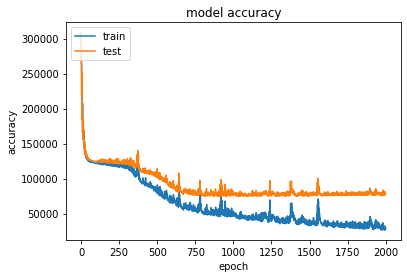

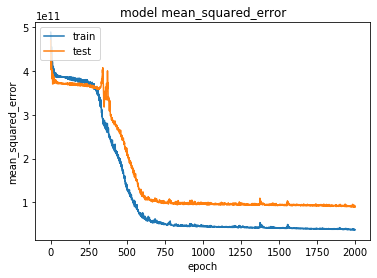

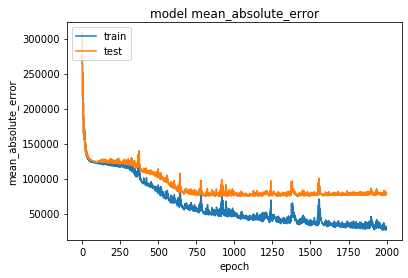

Median absolute error train: 14336.34375
Median absolute error train: 36454.1796875
Mean absolute error train: 31097.962719818956
Mean absolute error train: 77961.95670731626


In [43]:
globalAnalysis('modelv2')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               56320     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total para

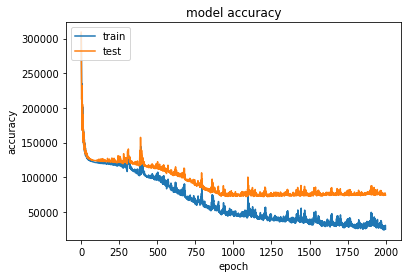

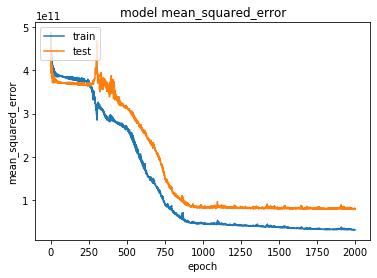

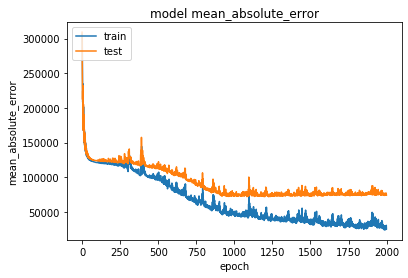

Median absolute error train: 11763.34375
Median absolute error train: 35326.359375
Mean absolute error train: 26835.89396834349
Mean absolute error train: 74576.51077524298


In [55]:
globalAnalysis('modelv5')

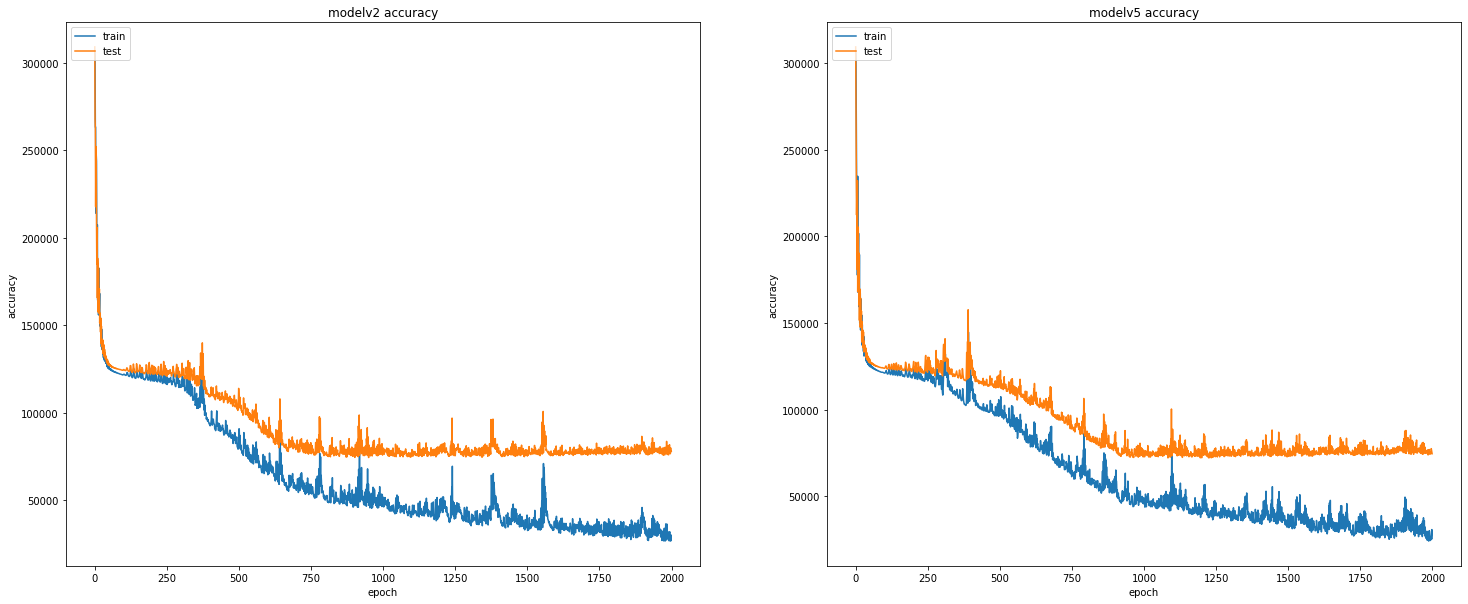

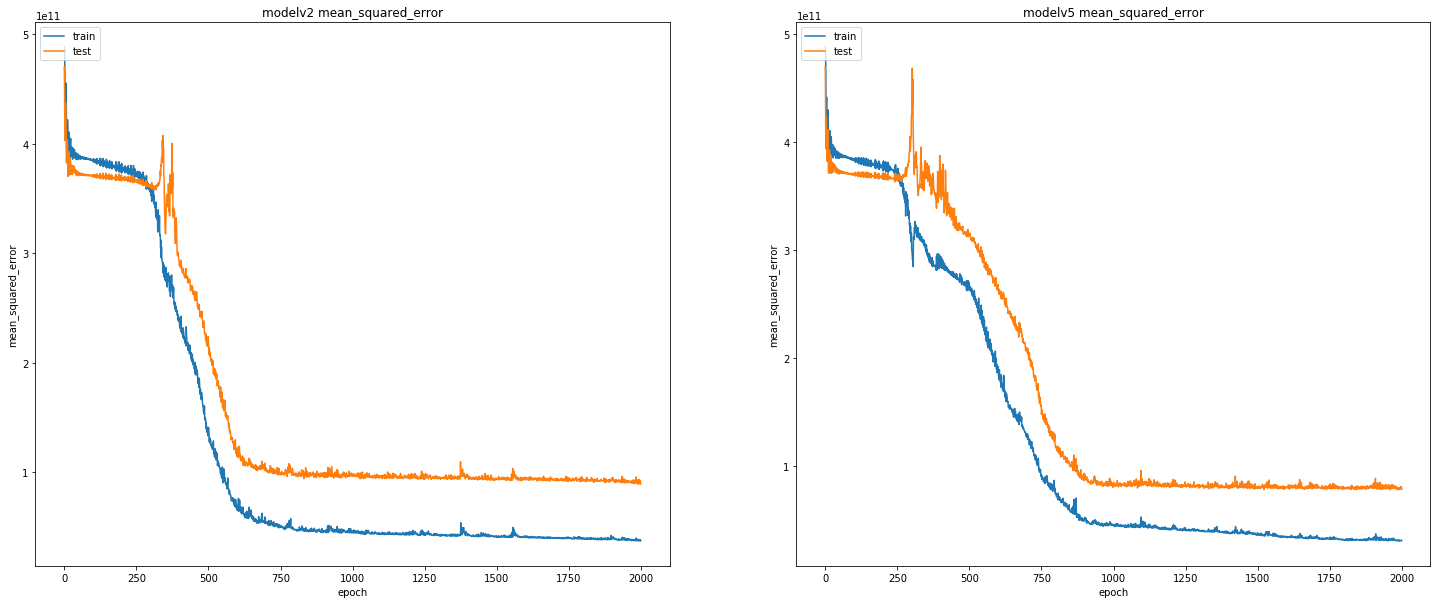

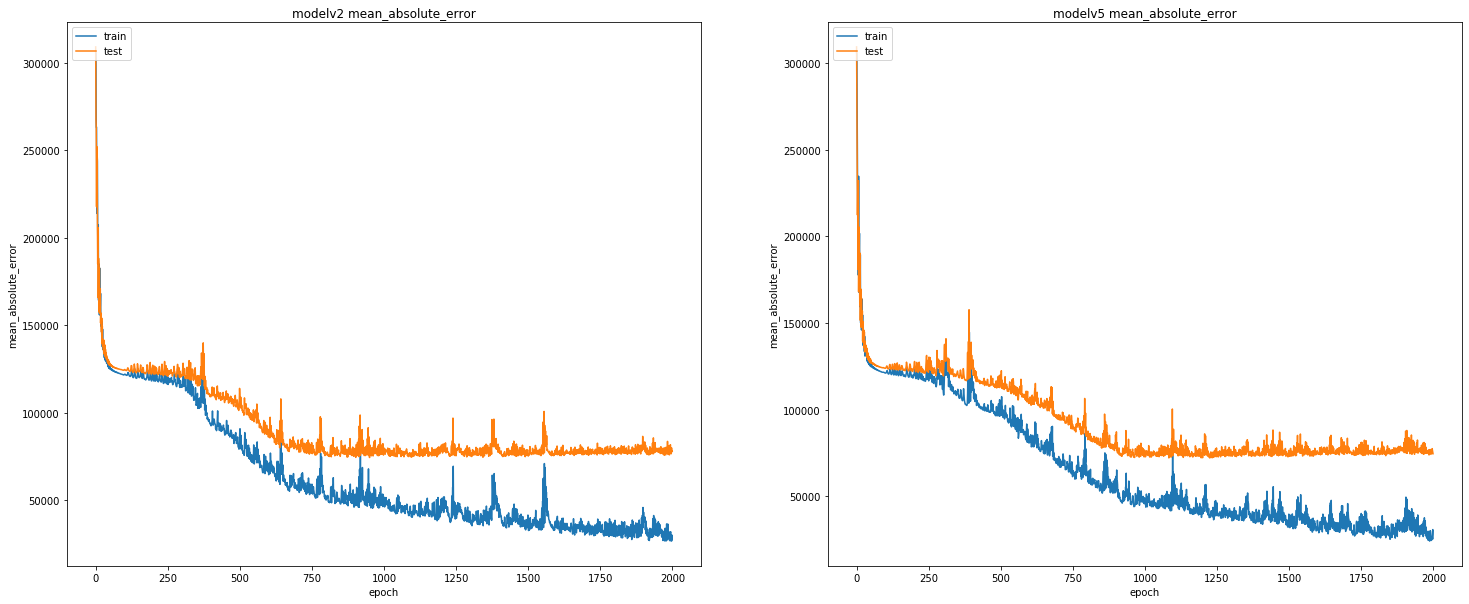

Median absolute error train: 
modelv2 14336.34375
modelv5 11763.34375
Median absolute error test: 
modelv2 36454.1796875
modelv5 35326.359375
Mean absolute error train: 
modelv2 31097.962719818956
modelv5 26835.89396834349
Mean absolute error test: 
modelv2 77961.95670731626
modelv5 74576.51077524298


In [106]:
compareTwoModel('modelv2','modelv5')

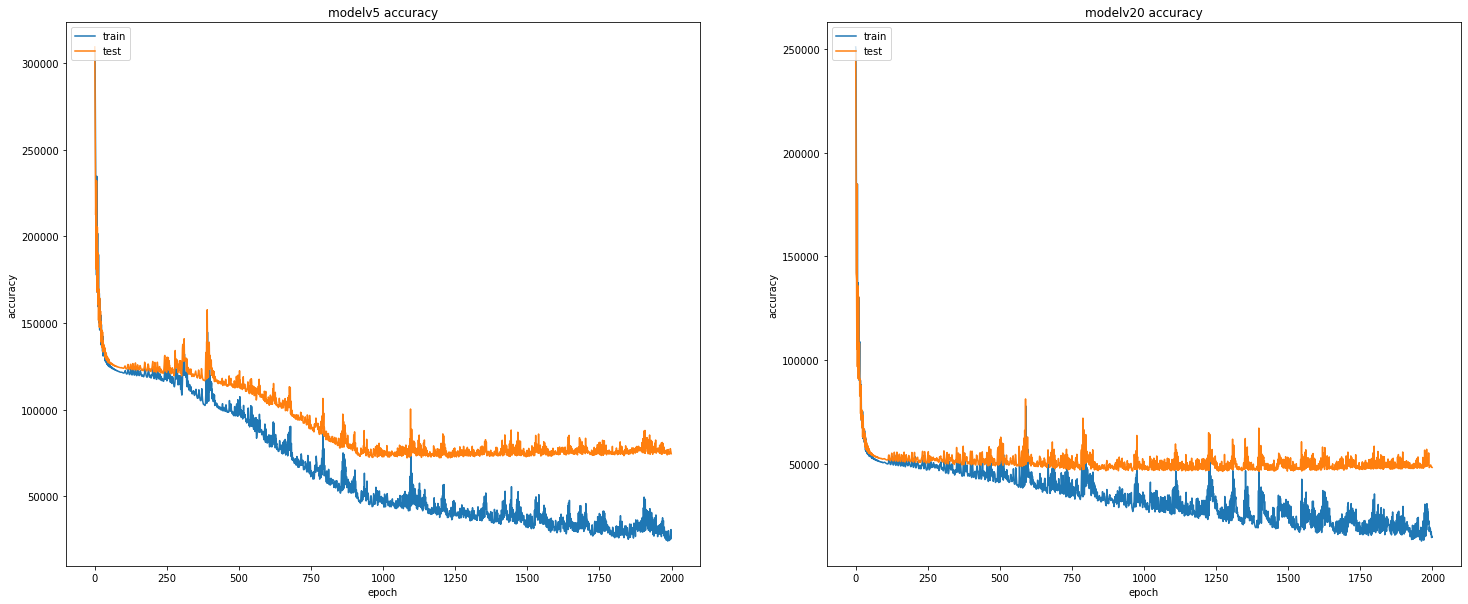

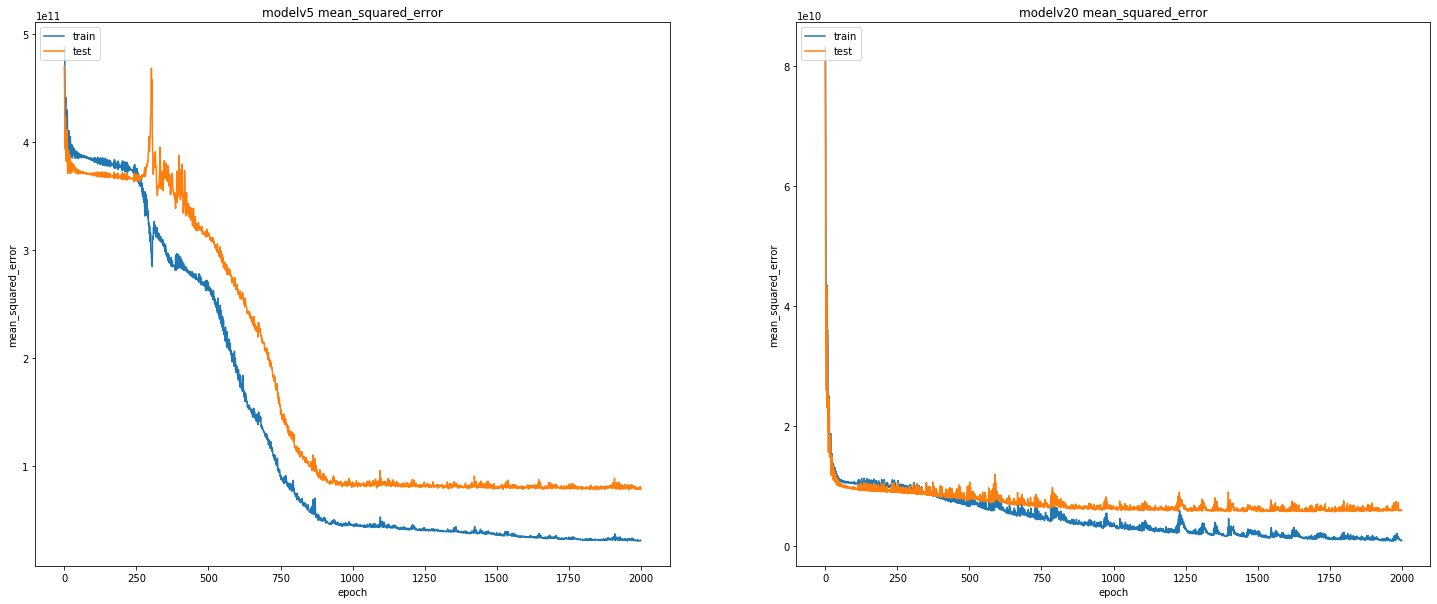

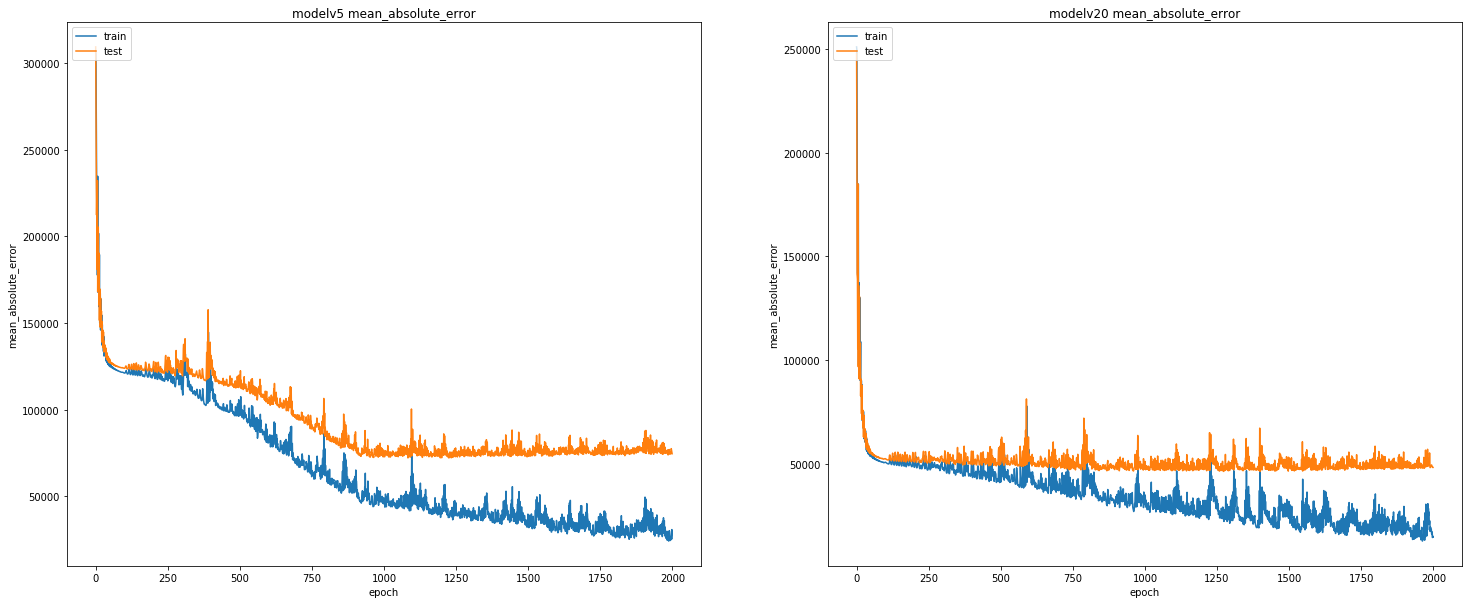

Median absolute error train: 
modelv5 11763.34375
modelv20 7899.34375
Median absolute error test: 
modelv5 35326.359375
modelv20 30672.03125
Mean absolute error train: 
modelv5 26835.89396834349
modelv20 13962.560521080184
Mean absolute error test: 
modelv5 74576.51077524298
modelv20 48398.181875705886


In [205]:
compareTwoModel('modelv5','modelv20')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               59904     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total para

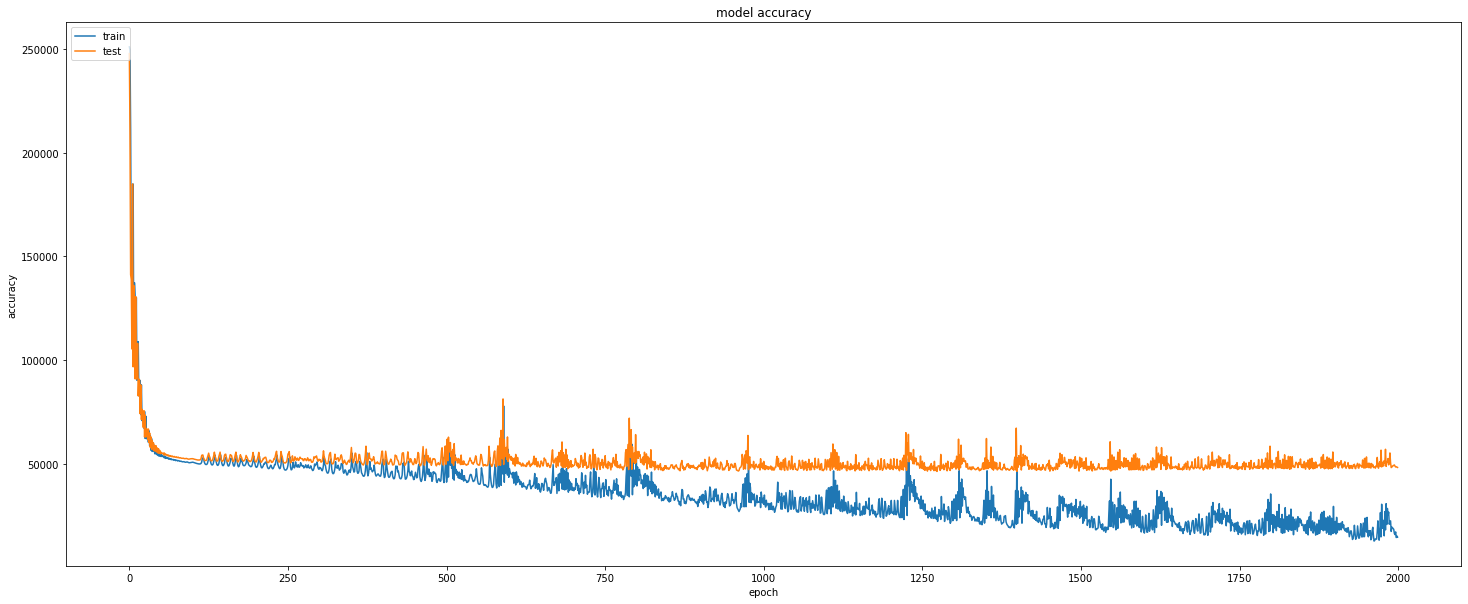

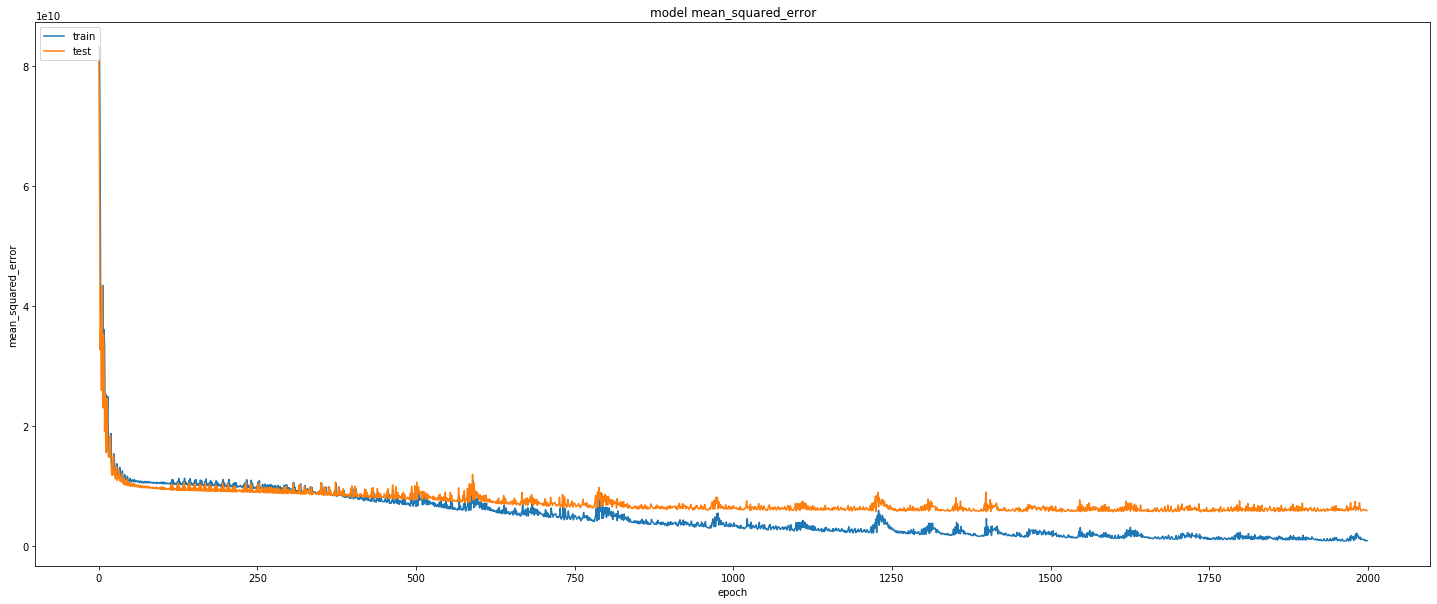

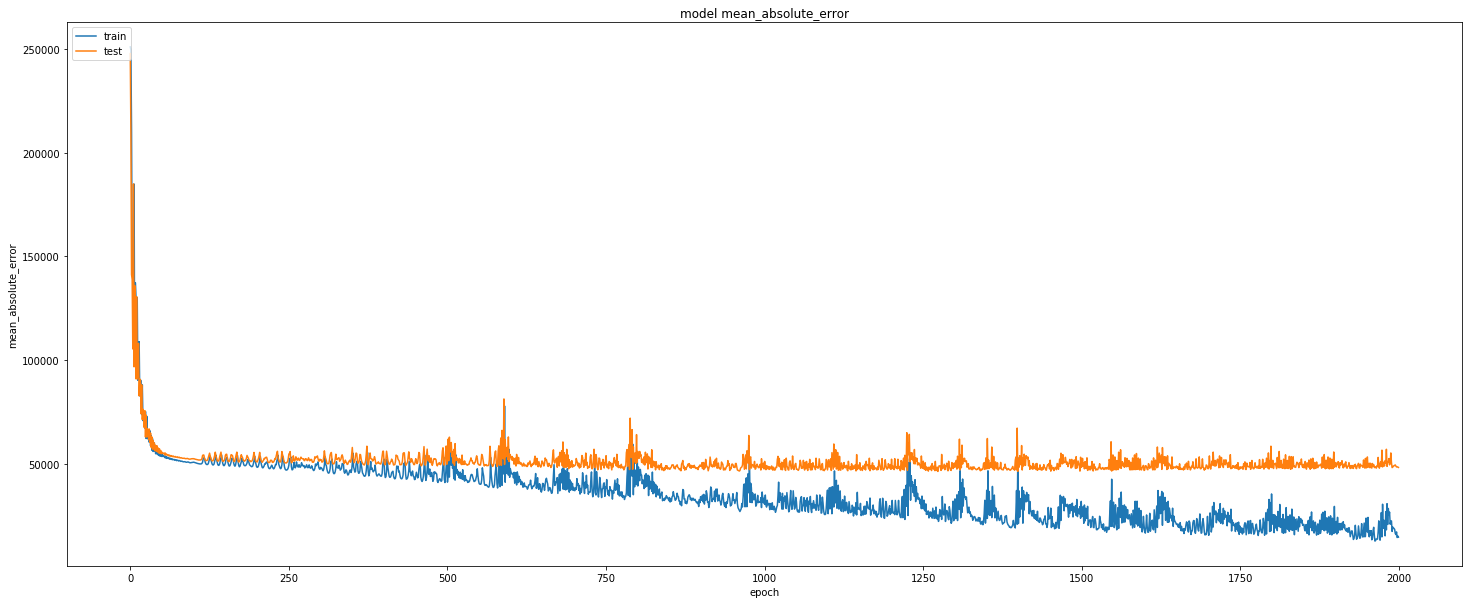

Median absolute error train: 7899.34375
Median absolute error train: 30672.03125
Mean absolute error train: 13962.560521080184
Mean absolute error train: 48398.181875705886


In [217]:
globalAnalysis('modelv20')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               58624     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total para

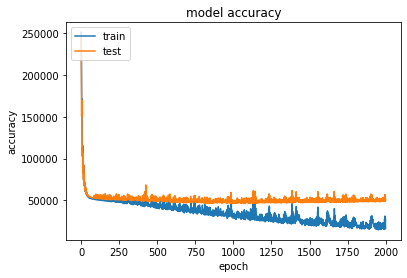

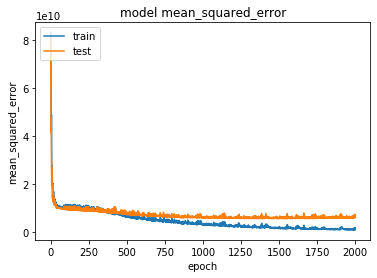

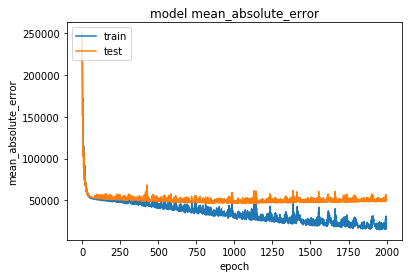

Median absolute error train: 15803.21875
Median absolute error train: 32811.1328125
Mean absolute error train: 25240.196194679917
Mean absolute error train: 51091.87016869644


In [14]:
globalAnalysis('modelv25')

In [236]:
err_train, err_test = retrievePercentErrorLimit('modelv25',25)

In [239]:
len(err_train)

0

In [240]:
len(err_test)

0

In [244]:
def tmp(name):
    # Chargement des données d'entrainement et de test
    data_train = pd.read_csv('data/models/'+ name +'.train.csv')
    data_test = pd.read_csv('data/models/'+ name +'.test.csv')

    X_train = data_train.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_train = data_train['valeur_fonciere'].to_numpy()
    X_test = data_test.drop(['valeur_fonciere'], axis=1).to_numpy()
    y_test = data_test['valeur_fonciere'].to_numpy()

    # Datasets normalisés
    X_train_normal, X_test_normal = normalize(X_train, X_test)
    
    return X_test_normal[0]

In [245]:
print(tmp('modelv25'))

[-8.87907516e-01 -8.86537476e-01 -1.08341245e+00 -2.82633789e-01
 -1.57398976e+00  1.35466577e+00 -6.16423876e-01 -5.78861836e-01
  8.66529126e-01 -9.23254724e-02  8.83107703e-01 -6.95647721e-01
 -3.52777438e-01 -3.32452477e-01  7.31164304e-01  6.36300207e-01
 -3.91270113e-01  1.51183819e-02  8.62426971e-01  5.30947769e-01
 -4.53118923e-01  5.10346367e-01  6.55513390e-01 -1.46078934e-01
 -3.34792302e-01  3.69294807e-01  9.00309441e-01  5.10028057e-02
 -4.34031514e-01 -9.07598659e-02 -4.81108772e-01 -5.54249827e-01
 -2.24490240e-01 -8.90913020e-01 -4.13950004e-01 -6.05700964e-01
 -3.05228826e-01 -4.02375027e-01 -8.43774497e-01 -3.03749529e-01
 -5.42384568e-01 -6.12818741e-01 -4.93388540e-01 -3.60465444e-01
 -4.93656364e-01 -2.90813456e-01 -6.68989887e-01 -2.09618909e-01
 -1.18571503e-01 -2.08681263e+00 -1.98869724e+00 -1.39071087e+00
  3.99201764e-01 -1.14507456e+00 -1.50136957e+00 -2.13604149e+00
 -1.95387627e+00 -6.94696428e-01  8.32170209e-01 -1.15099308e+00
 -1.50649601e+00 -2.38007